10
(120,)


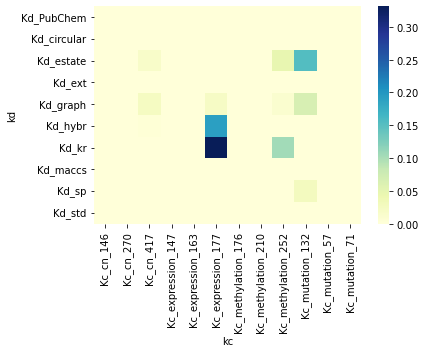

30
(120,)


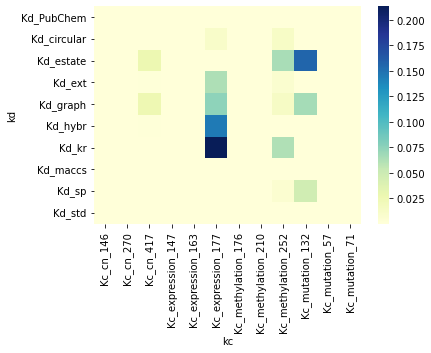

50
(120,)


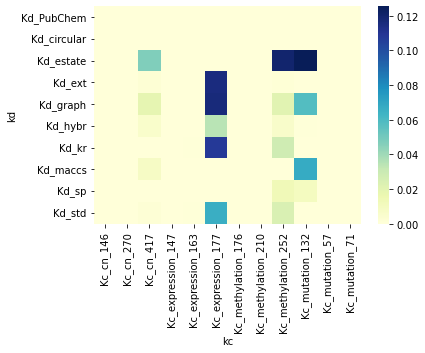

70
(120,)


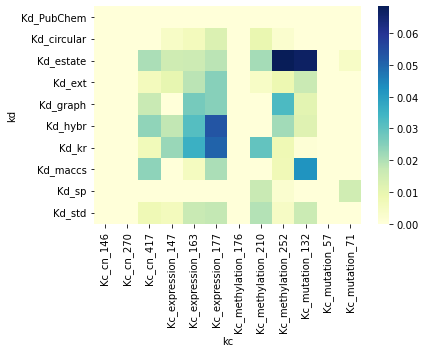

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for percentage in [10, 30, 50, 70]:
    basepath = "../imputed_kernels_results/isvd/"+\
        str(percentage)
        
    print(percentage)
    with open(f'{basepath}/pairwise_kernel_names.txt', 'r') as f:
        kernel_names = f.read().split('\t')
        kds = [kn.split('.txt')[0] for kn in kernel_names[:-1]]
        kcs = [kn.split('.txt')[1] for kn in kernel_names[:-1]]
        kcs = [kc.replace('_KRONECKER_', '') for kc in kcs]

    # print("KD-----------")
    # print(kds)

    # print("KC-----------")
    # print(kcs)


    data = np.loadtxt( basepath + "/pairwise_kernel_weights.txt").mean(axis=0)
    print(data.shape)

    df2 = pd.DataFrame(data={
        'kd': kds,
        'kc': kcs,
        'peso': data
    })

    # display(df2)

    matrix = df2.groupby(['kd','kc'])['peso'].mean().unstack()
    sns.heatmap(matrix, cmap="YlGnBu", cbar=True, annot=False)
    plt.savefig('heatmaps_v2/isvd_{}.pdf'.format(percentage),  bbox_inches='tight')
    plt.show()

    # break

    # print(data)
    # sns.heatmap(data, cmap="YlGnBu", cbar=True, annot=False)
